# Factors influencing Bike Sharing in San Franscisco Bay Area
## by Janat Birungi

## Investigation Overview
In this analysis, I wanted to findout what factors affected ride sharing in the San Franscisco bay area. My main focus was on the time the trip started, day of the week, gender and duration of the ride. 

## Dataset Overview
The dataset consisted of 183413 individual rides taken. The variables included start_time, end_time, member_gender, duration_sec and other variables which were 16 in total. I transformed the start_time variable to extract start_hour of the ride and the day of the week. I also converted duration_sec into minutes to ease my analysis. 


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from datetime import datetime
import calendar

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
def read_csv_file(filename):
    """function to read csv files and first 15 rows"""
    data = pd.read_csv(filename)
    data 
    
    return data
rides = read_csv_file('201902-fordgobike-tripdata.csv')
rides

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# replace missing values to prep data for analysis
cols_num = ['member_birth_year','start_station_id','end_station_id']
col_cat = ['member_gender', 'start_station_name', 'end_station_name']

rides[cols_num] = rides[cols_num].fillna(0)
rides[col_cat] = rides[col_cat].replace({'NaN':'None'})

# add extra column- duration in minutes(duration_min) and age of the rider(member_age_at_ride_date)
rides['duration_min'] = np.around(rides['duration_sec']/60)
rides['member_age_at_ride_date'] = 2019 - rides['member_birth_year'] 

# create a column for start time (separate time from the date and extract the hour from the timestamp)

rides['start_hour'] = rides['start_time'].apply(lambda x:x.split()[1])
rides['start_hour'] = rides['start_hour'].apply(lambda x:x.split(':')[0])

# convert column data types 
rides['member_birth_year'] = rides['member_birth_year'].astype('int')
rides['member_gender'] = rides['member_gender'].astype('category')
rides['user_type'] = rides['user_type'].astype('category')
rides['bike_share_for_all_trip'] = rides['bike_share_for_all_trip'].astype('category')
rides['start_station_id'] = rides['start_station_id'].astype('category')
rides['end_station_id'] = rides['end_station_id'].astype('category')
rides['duration_min'] = rides['duration_min'].astype('int')
rides['start_hour'] = rides['start_hour'].astype('int')

# split the date from the start time and convert it into day of the week, make it categorical and ordered
rides['day_of_week'] = rides['start_time'].apply(lambda x:x.split()[0])
rides['day_of_week'] = pd.to_datetime(rides['day_of_week'])
rides['day_of_week'] = rides['day_of_week'].dt.day_name()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_order = pd.api.types.CategoricalDtype(ordered= True, categories= days)
rides['day_of_week'] = rides['day_of_week'].astype(day_order)

## Distribution of start hour

Start hour has a bimodal distribution with the first peak between 7am and 9am and the second peak between 4pm(16) and 6pm(18). After the first peak, there is a sharp deep after 9pm showing a decrease in frequency of rides

''

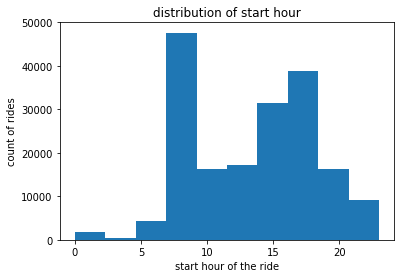

In [4]:
# distribution of start hour
base_color = sb.color_palette()[0]
plt.hist(data= rides, x ='start_hour')
plt.xlabel('start hour of the ride')
plt.ylabel('count of rides')
plt.title('distribution of start hour')
;

## Effect of day of the week on the distribution of rides

Thursdays had the most rides taken in February 2019, with Tuesday coming in second. The days with the least rides was Saturday and Sunday which might mean that people take less rides on the weekends

''

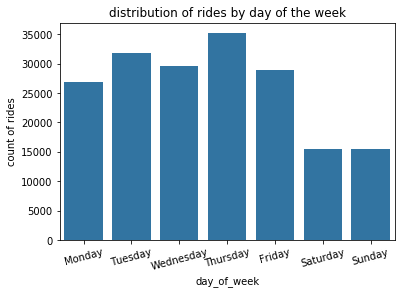

In [5]:
# distribution by days of the week
sb.countplot(data= rides, x= 'day_of_week', color= base_color)
plt.xticks(rotation = 15)
plt.ylabel('count of rides')
plt.title('distribution of rides by day of the week')
;

## Relationship between day of the week and start hour of trip
The violin plot clearly shows the two peak times in trip start between 7am and 9pm and 4pm and 6pm. Looking at the violin plot, it looks like Monday, Tuesday, Wednesday, Thursday and Friday have the same start hours with both peaks clear throughout those days. The box plot shows a clear pattern in for days like Mondays and Tuesdays median start hour is 2pm, Wednesdays and Thursdays median start time is about 4pm,Sunday and Saturday around 3pm with Friday having it's own unique start time at around 12pm.


''

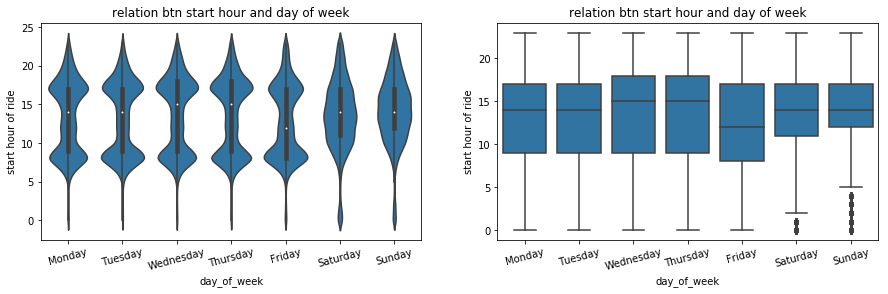

In [6]:
# plot relationship between start hour and day of week
plt.figure(figsize= [15,4])

# first plot a violin plot
plt.subplot(1,2,1)
sb.violinplot(data= rides, x = 'day_of_week', y= 'start_hour', color= base_color)
plt.xticks(rotation = 15)
plt.ylabel('start hour of ride')
plt.title('relation btn start hour and day of week')
;
# second, plot a box plot to get clear picture
plt.subplot(1,2,2)
sb.boxplot(data= rides, x = 'day_of_week', y= 'start_hour', color= base_color)
plt.xticks(rotation = 15)
plt.ylabel('start hour of ride')
plt.title('relation btn start hour and day of week')
;

## Relationship between day of week, gender and start hour

Generally, all sexes take long trips on Sunday. The 'other' sex takes long trips on Wednesday too. Friday trips are the shortest across the board for all sexes.

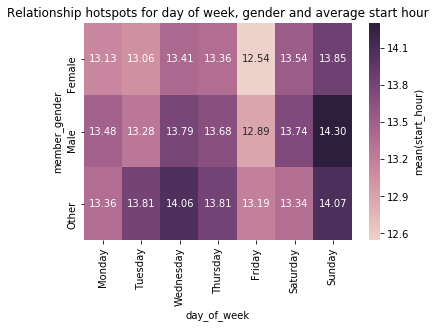

In [7]:
#heatmap of relationship between day of week, gender and start hour 
hour_mean = rides.groupby(['day_of_week', 'member_gender']).mean()['start_hour']
hour_mean = hour_mean.reset_index(name = 'start_hour_avg')
hour_mean = hour_mean.pivot(index = 'member_gender', columns='day_of_week',
                           values= 'start_hour_avg')
sb.heatmap(hour_mean, annot= True, fmt = '.2f', cmap=sb.cubehelix_palette(as_cmap=True), cbar_kws= {'label': 'mean(start_hour)'});

plt.title('Relationship hotspots for day of week, gender and average start hour');

## Relationship between day of week, duration and start hour
Longer trips are taken by the 'other' gender mainly on Sundays, Saturday and Thursday. Males tend to take longer trips on Friday and Females tend to take longer trips on Sunday. Let's look at start hour to understand this further

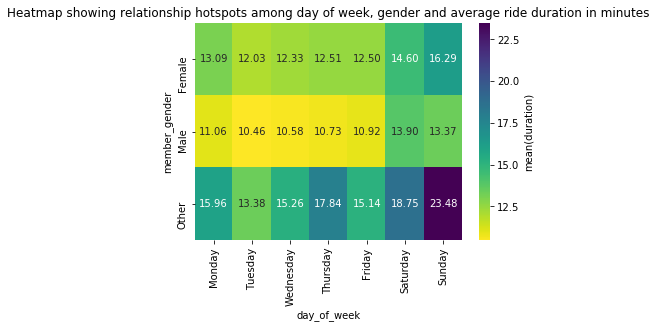

In [8]:
# heatmap of relationship between day of week, gender and duration in minutes
hour_mean = rides.groupby(['day_of_week', 'member_gender']).mean()['duration_min']
hour_mean = hour_mean.reset_index(name = 'duration_avg')
hour_mean = hour_mean.pivot(index = 'member_gender', columns='day_of_week',
                           values= 'duration_avg')
sb.heatmap(hour_mean, annot= True, fmt = '.2f', cmap='viridis_r', cbar_kws= {'label': 'mean(duration)'})
plt.title('Heatmap showing relationship hotspots among day of week, gender and average ride duration in minutes');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [2]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_bike_sharing_analysis.ipynb --to slides --post serve --no-input --no-prompt --template output-toggle.tpl

[NbConvertApp] Converting notebook Part_II_slide_deck_bike_sharing_analysis.ipynb to slides
[NbConvertApp] Writing 443524 bytes to Part_II_slide_deck_bike_sharing_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_bike_sharing_analysis.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
